In [39]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib.pyplot as plt
import pandas as pd
from sqlalchemy import create_engine
import datetime as dt
import seaborn as sns
from scipy import stats
import numpy as np
import pickle

In [40]:
# Postgres username, password, and database name
POSTGRES_ADDRESS = 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com' ## INSERT YOUR DB ADDRESS IF IT'S 
# NOT ON PANOPLY
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'lhl_student' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES USERNAME
POSTGRES_PASSWORD = 'lhl_student' ## CHANGE THIS TO YOUR PANOPLY/POSTGRES PASSWORD 
POSTGRES_DBNAME = 'mid_term_project' ## CHANGE THIS TO YOUR DATABASE NAME
# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
              .format(username=POSTGRES_USERNAME,
               password=POSTGRES_PASSWORD,
               ipaddress=POSTGRES_ADDRESS,
               port=POSTGRES_PORT,
               dbname=POSTGRES_DBNAME))

In [41]:
cnx = create_engine(postgres_str)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [51]:
date_arr_delay = pd.read_sql_query('''SELECT fl_date, arr_delay FROM flights;''', cnx)

In [52]:
date_arr_delay['fl_date'] = pd.to_datetime(date_arr_delay['fl_date'], format='%Y-%m-%d')

In [214]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/date_arr_delay.pkl', 'wb') as f:
    pickle.dump(date_arr_delay, f)

In [7]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/date_arr_delay.pkl', 'rb') as f:
    date_arr_delay = pickle.load(f)

In [53]:
date_arr_delay.head()

,fl_date,arr_delay
0,2019-06-21,-15.0
1,2019-06-21,147.0
2,2019-06-21,-12.0
3,2019-06-21,26.0
4,2019-06-21,136.0


fl_date      0
arr_delay    0
month        0
year         0
dtype: int64

In [5]:
jan_arr_delay = date_arr_delay[date_arr_delay['fl_date'].dt.month == 1]

In [6]:
jan_arr_delay['arr_delay'].median()

-7.0

In [56]:
jan_arr_delay.isnull().sum()
jan_arr_delay['arr_delay'] = jan_arr_delay['arr_delay'].fillna(jan_arr_delay['arr_delay'].median())

<ipython-input-56-586626788d5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jan_arr_delay['arr_delay'] = jan_arr_delay['arr_delay'].fillna(jan_arr_delay['arr_delay'].median())


In [57]:
jan_arr_delay.shape

(1239868, 2)

In [58]:
no_outliers = jan_arr_delay[(np.abs(stats.zscore(jan_arr_delay['arr_delay'])) < 3)]

In [59]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest
data = no_outliers['arr_delay']
stat, p = normaltest(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=583867.208, p=0.000
Probably not Gaussian


In [60]:
neg_mean = jan_arr_delay['arr_delay'].mean()
neg_mean

3.762365832491846

In [61]:
counts = jan_arr_delay['arr_delay'].value_counts()

In [62]:
zero_delays = jan_arr_delay['arr_delay'].apply(lambda x: 0 if x < 0 else x)

In [63]:
zero_delays.mean()

13.328021208709314

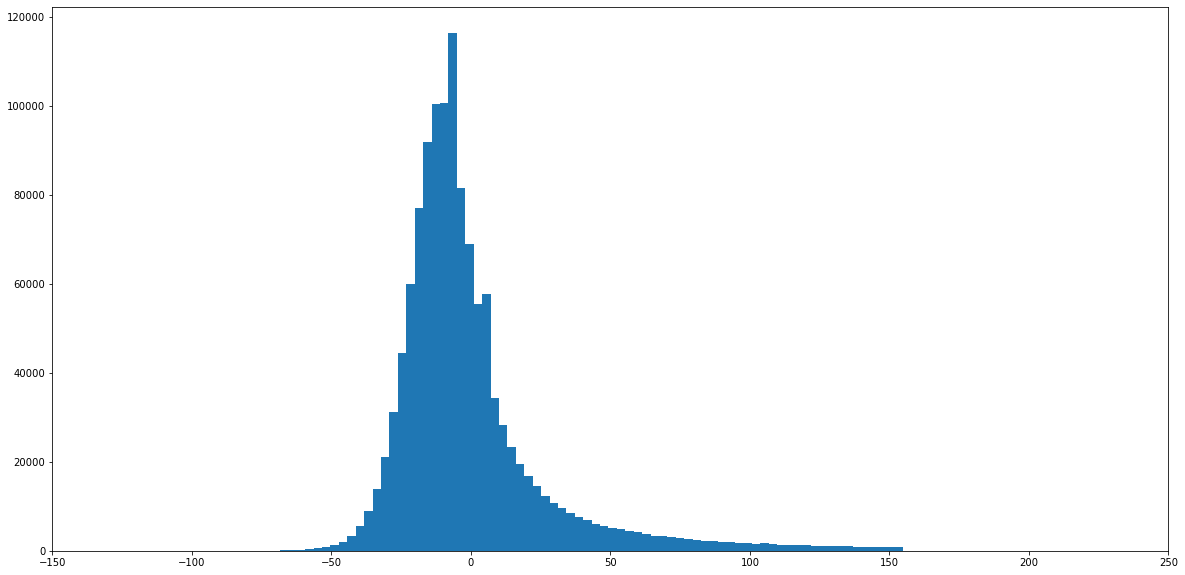

In [64]:
plt.figure(figsize=(20, 10))
plt.hist(no_outliers['arr_delay'], bins=100)
plt.xlim(-150, 250)
plt.show()

In [65]:
jan_arr_delay['arr_delay'].max()

2023.0

In [66]:
jan_arr_delay.shape

(1239868, 2)

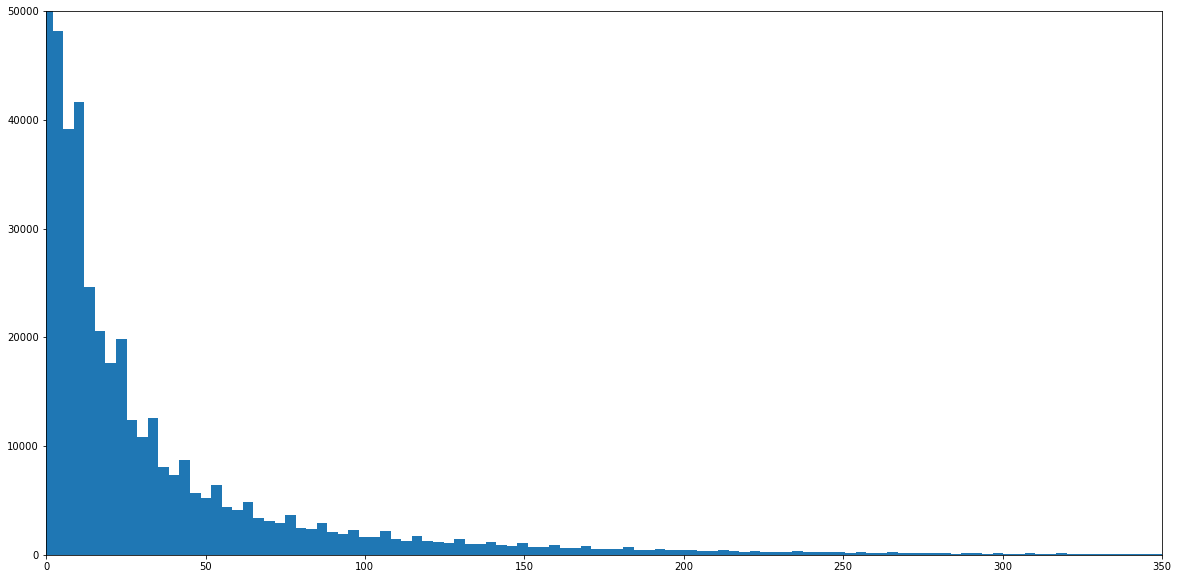

In [67]:
plt.figure(figsize=(20,10))
plt.hist(jan_arr_delay['arr_delay'], bins=1000)
plt.xlim(0,350)
plt.ylim(0,50000)
plt.show()

In [8]:
date_arr_delay['month'] = date_arr_delay['fl_date'].dt.month
date_arr_delay['year'] = date_arr_delay['fl_date'].dt.year

In [9]:
date_arr_delay['arr_delay'] = date_arr_delay['arr_delay'].fillna(date_arr_delay['arr_delay'].median())

In [80]:
monthly_yearly = date_arr_delay.groupby(['year', 'month']).arr_delay.mean().reset_index()

In [92]:
monthly_yearly_median = date_arr_delay.groupby(['year', 'month']).arr_delay.median().reset_index()

In [95]:
year_2018 = monthly_yearly[monthly_yearly['year'] == 2018]
year_2019 = monthly_yearly[monthly_yearly['year'] == 2019]
year_2018_median = monthly_yearly_median[monthly_yearly_median['year'] == 2018]
year_2019_median = monthly_yearly_median[monthly_yearly_median['year'] == 2019]

In [83]:
year_2018

,year,month,arr_delay
0,2018,1,3.162199
1,2018,2,3.918344
2,2018,3,1.864849
3,2018,4,3.466949
4,2018,5,5.786645
5,2018,6,8.488950
6,2018,7,8.655668
7,2018,8,9.696633
8,2018,9,2.828388
9,2018,10,2.974160


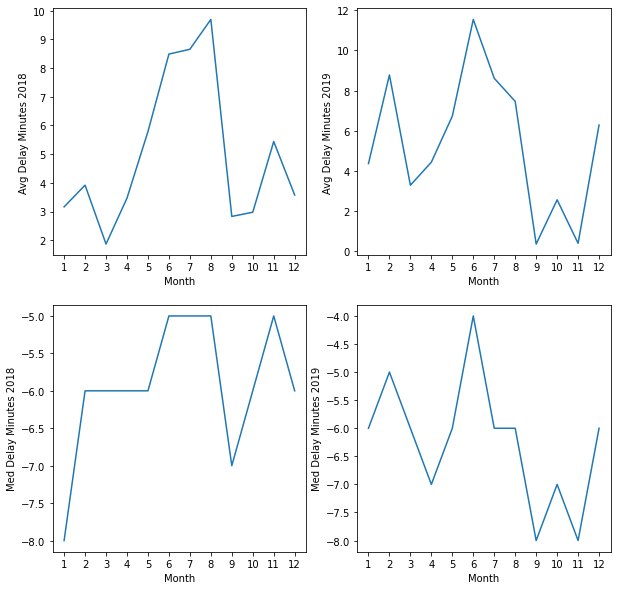

In [122]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

ax1.plot(year_2018['month'], year_2018['arr_delay'])
ax2.plot(year_2019['month'], year_2019['arr_delay'])
ax3.plot(year_2018_median['month'], year_2018_median['arr_delay'])
ax4.plot(year_2019_median['month'], year_2019_median['arr_delay'])
ax1.set_xticks(year_2018['month'])
ax2.set_xticks(year_2018['month'])
ax3.set_xticks(year_2018['month'])
ax4.set_xticks(year_2018['month'])
ax1.set_ylabel('Avg Delay Minutes 2018')
ax2.set_ylabel('Avg Delay Minutes 2019')
ax3.set_ylabel('Med Delay Minutes 2018')
ax4.set_ylabel('Med Delay Minutes 2019')
ax1.set_xlabel('Month')
ax2.set_xlabel('Month')
ax3.set_xlabel('Month')
ax4.set_xlabel('Month')
plt.show()

In [125]:
taxi = pd.read_sql_query('''SELECT taxi_in, taxi_out, wheels_on, wheels_off FROM flights;''', cnx)

In [128]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/taxi.pkl', 'wb') as f:
    pickle.dump(taxi, f)

In [250]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/taxi.pkl', 'rb') as f:
    taxi = pickle.load(f)

In [251]:
taxi
taxi_values = pd.Series.append(taxi['taxi_in'], taxi['taxi_out']).reset_index(drop=True)
taxi_times = pd.Series.append(taxi['wheels_on'], taxi['wheels_off']).reset_index(drop=True)

In [252]:
combined_taxi = pd.DataFrame({'taxi_duration': taxi_values, 'taxi_times':taxi_times})

In [253]:
combined_taxi['hour'] = combined_taxi['taxi_times'].apply(lambda x: str(x)[:2] if len(str(x)) == 6 else (str(x)[0] if len(str(x)) == 5 else '0'))

In [256]:
combined_taxi['hour'].value_counts()

10    1907127
18    1890016
11    1881574
12    1871023
16    1867723
17    1848744
14    1820549
13    1820247
15    1820125
9     1793145
8     1779504
19    1738129
20    1730791
7     1606875
21    1462857
6     1343572
22    1239703
0      911078
23     864350
5      414352
1      125805
4       51850
2       39771
3       18628
24       7432
Name: hour, dtype: int64

In [257]:
combined_taxi['hour'] = combined_taxi['hour'].replace('24', '0')

In [258]:
combined_taxi['hour'].value_counts()

10    1907127
18    1890016
11    1881574
12    1871023
16    1867723
17    1848744
14    1820549
13    1820247
15    1820125
9     1793145
8     1779504
19    1738129
20    1730791
7     1606875
21    1462857
6     1343572
22    1239703
0      918510
23     864350
5      414352
1      125805
4       51850
2       39771
3       18628
Name: hour, dtype: int64

In [232]:
combined_taxi['taxi_duration'] = combined_taxi['taxi_duration'].fillna(combined_taxi['taxi_duration'].median())
combined_taxi['taxi_times'] = combined_taxi['taxi_times'].fillna(combined_taxi['taxi_times'].median())

In [233]:
taxi_hour = combined_taxi.groupby('hour').taxi_duration.mean().reset_index()

In [234]:
taxi_count = combined_taxi.groupby('hour').taxi_duration.count().reset_index()

In [263]:
taxi_hour = taxi_hour.rename(columns={'taxi_duration': 'mean_duration'})

In [264]:
taxi_count = taxi_count.rename(columns={'taxi_duration': 'taxi_count'})

In [265]:
taxi_hour['hour'] = taxi_hour['hour'].astype('int')

In [266]:
taxi_count['hour'] = taxi_hour['hour'].astype('int')

In [267]:
taxi_hour = taxi_hour.sort_values('hour')

In [268]:
taxi_count = taxi_count.sort_values('hour')

In [269]:
combined_taxi = combined_taxi.drop('taxi_times', axis=1)

In [270]:
taxi_hour_count = taxi_count.merge(taxi_hour, on='hour')

In [274]:
taxi_hour_count.head()

,hour,taxi_count,mean_duration
0,0,918510,10.332934
1,1,125805,9.260459
2,2,39771,8.553569
3,3,18628,8.611284
4,4,51850,7.386635


In [275]:
taxi_hour_count[['taxi_count', 'mean_duration']].corr()

,taxi_count,mean_duration
taxi_count,1.000000,0.855862
mean_duration,0.855862,1.000000


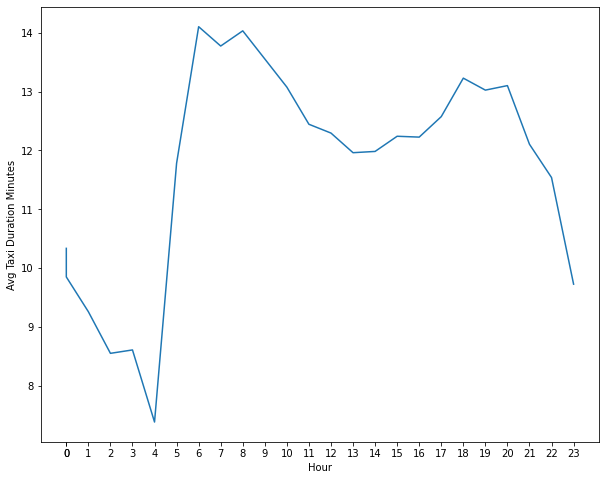

In [148]:
plt.figure(figsize=(10, 8))
plt.plot(taxi_hour['hour'], taxi_hour['taxi_duration'])
plt.xticks(taxi_hour['hour'])
plt.xlabel('Hour')
plt.ylabel('Avg Taxi Duration Minutes')
plt.show()

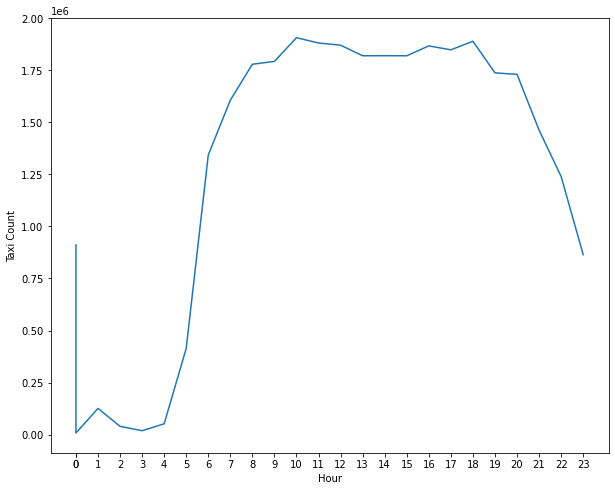

In [149]:
plt.figure(figsize=(10, 8))
plt.plot(taxi_count['hour'], taxi_count['taxi_duration'])
plt.xticks(taxi_hour['hour'])
plt.xlabel('Hour')
plt.ylabel('Taxi Count')
plt.show()

In [49]:
dep_delay = pd.read_sql_query('''SELECT dep_delay FROM flights;''', cnx)

In [49]:
dep_delay['dep_delay'] = dep_delay['dep_delay'].fillna(dep_delay['dep_delay'].median())

In [51]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/dep_delay.pkl', 'wb') as f:
    pickle.dump(dep_delay, f)

In [3]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/dep_delay.pkl', 'rb') as f:
    dep_delay = pickle.load(f)

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(dep_delay, date_arr_delay['arr_delay'])
# plt.xticks(dep_delay)
# plt.yticks(date_arr_delay['arr_delay'])
plt.xlabel('Departure Delay Minutes')
plt.ylabel('Arrival Delay Minutes')
plt.show()

In [14]:
dep_vs_arr = date_arr_delay.join(dep_delay)

In [15]:
dep_vs_arr

,fl_date,arr_delay,month,year,dep_delay
0,2019-06-21,-15.0,6,2019,5.0
1,2019-06-21,147.0,6,2019,-9.0
2,2019-06-21,-12.0,6,2019,-12.0
3,2019-06-21,26.0,6,2019,-5.0
4,2019-06-21,136.0,6,2019,8.0
...,...,...,...,...,...
15927480,2019-06-21,-24.0,6,2019,-7.0
15927481,2019-06-21,40.0,6,2019,-5.0
15927482,2019-06-21,60.0,6,2019,-5.0
15927483,2019-06-21,-32.0,6,2019,-1.0


In [26]:
dep_vs_arr['dependent'] = (dep_vs_arr['dep_delay'] > 0) & (dep_vs_arr['arr_delay'] > 0)
dep_vs_arr['delays'] = dep_vs_arr['arr_delay'] > 0

In [27]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/dep_vs_arr.pkl', 'wb') as f:
    pickle.dump(dep_vs_arr, f)

In [28]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/dep_vs_arr.pkl', 'rb') as f:
    dep_vs_arr = pickle.load(f)

In [31]:
dep_vs_arr_counts = dep_vs_arr['dependent'].value_counts()
delay_counts = dep_vs_arr['delays'].value_counts()

In [33]:
dep_vs_arr_counts, delay_counts

(False    14099580
 True      1827905
 Name: dependent, dtype: int64,
 False    10451876
 True      5475609
 Name: delays, dtype: int64)

In [34]:
dep_vs_arr_per = dep_vs_arr_counts[1] / delay_counts[1]

In [35]:
dep_vs_arr_per

0.33382679442597163

In [244]:
#average time gain if a departure was delayed
delayed_depart = dep_vs_arr[dep_vs_arr['dep_delay'] > 0]

In [245]:
time_made = delayed_depart['dep_delay'] - delayed_depart['arr_delay']

In [247]:
time_made.mean()

35.411756701464704

In [10]:
distance = pd.read_sql_query('''SELECT distance FROM flights;''', cnx)

In [11]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/distance.pkl', 'wb') as f:
    pickle.dump(distance, f)

In [21]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/distance.pkl', 'rb') as f:
    distance = pickle.load(f)

In [8]:
one_third = ((distance.max() - distance.min()) / 3) + distance.min()

In [9]:
two_thirds = ((distance.max() - distance.min()) / 3) * 2 + distance.min()

In [10]:
distance.min(), one_third, two_thirds, distance.max()

(distance    16.0
 dtype: float64,
 distance    1709.0
 dtype: float64,
 distance    3402.0
 dtype: float64,
 distance    5095.0
 dtype: float64)

In [11]:
distance['haul'] = distance['distance'].apply(lambda x: 'short' if x <= one_third.values 
                                              else ('medium' if x <= two_thirds.values else 'long'))

In [16]:
dep_vs_arr.columns

Index(['fl_date', 'arr_delay', 'month', 'year', 'dep_delay', 'dependent'], dtype='object')

In [71]:
df = dep_vs_arr.join(distance)

In [80]:
df['hour'] = taxi['wheels_off'].apply(lambda x: str(x)[:2] if len(str(x)) == 6 else str(x)[0])

In [96]:
# some values equal 'n' but I don't know if I should replace them with anything
df['hour'] = df['hour'].replace('24', '0')

In [138]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/df.pkl', 'wb') as f:
    pickle.dump(df, f)

In [23]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/df.pkl', 'rb') as f:
    df = pickle.load(f)

,fl_date,arr_delay,month,year,dep_delay,dependent,distance,haul,hour
0,2019-06-21,-15.0,6,2019,5.0,False,819.0,short,10
1,2019-06-21,147.0,6,2019,-9.0,False,862.0,short,14
2,2019-06-21,-12.0,6,2019,-12.0,False,1062.0,short,11
3,2019-06-21,26.0,6,2019,-5.0,False,1325.0,short,18
4,2019-06-21,136.0,6,2019,8.0,True,948.0,short,6
...,...,...,...,...,...,...,...,...,...
15927480,2019-06-21,-24.0,6,2019,-7.0,False,1041.0,short,17
15927481,2019-06-21,40.0,6,2019,-5.0,False,748.0,short,18
15927482,2019-06-21,60.0,6,2019,-5.0,False,937.0,short,11
15927483,2019-06-21,-32.0,6,2019,-1.0,False,967.0,short,7


In [134]:
haul_hour = df.groupby(['haul', 'hour']).fl_date.count().reset_index()

In [135]:
haul_hour['hour'] = haul_hour['hour'].apply(lambda x: int(x) if x != 'n' else 'n')

In [136]:
haul_hour = haul_hour.sort_values(['haul', 'hour']).reset_index(drop=True)

In [137]:
pd.set_option('display.max_rows', 500)
print(haul_hour.head(75))

      haul hour  fl_date
0     long    1       66
1     long    2       34
2     long    3       23
3     long    4       26
4     long    5      376
5     long    6     1258
6     long    7     1201
7     long    8     1146
8     long    9     1133
9     long   10     1136
10    long   11     1154
11    long   12     1172
12    long   13     1098
13    long   14     1098
14    long   15     1093
15    long   16     1068
16    long   17     1072
17    long   18     1164
18    long   19     1020
19    long   20     1023
20    long   21      671
21    long   22      668
22    long   23      260
23    long    n      328
24  medium    0      176
25  medium    1     4864
26  medium    2     2217
27  medium    3     1576
28  medium    4     1518
29  medium    5    25144
30  medium    6    85043
31  medium    7    82334
32  medium    8    79740
33  medium    9    75371
34  medium   10    80018
35  medium   11    79568
36  medium   12    80668
37  medium   13    73744
38  medium   14    74915


In [29]:
airport = pd.read_sql_query('''SELECT origin FROM flights;''', cnx)

In [36]:
airport_dest = pd.read_sql_query('''SELECT dest FROM flights;''', cnx)

In [52]:
busy = airport.join(date_arr_delay['fl_date'])

In [53]:
busy = busy.rename(columns={'origin': 'airport'})

In [54]:
busy['month'] = busy['fl_date'].dt.month

In [55]:
busy2 = airport_dest.join(date_arr_delay['fl_date'])

In [56]:
busy2 = busy2.rename(columns={'dest': 'airport'})

In [60]:
busy2['month'] = busy2['fl_date'].dt.month

In [61]:
busy_total = pd.DataFrame.append(busy, busy2).reset_index(drop=True)

In [103]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/busy_total.pkl', 'wb') as f:
    pickle.dump(busy_total, f)

In [ ]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/busy_total.pkl', 'rb') as f:
    busy_total = pickle.load(f)

In [77]:
busy_grouped = busy_total.groupby(['airport', 'month']).fl_date.count().reset_index()

In [79]:
busy_grouped = busy_grouped.rename(columns={'fl_date': 'num_flights'})

In [80]:
busy_grouped

,airport,month,num_flights
0,ABE,1,1866
1,ABE,2,1796
2,ABE,3,1853
3,ABE,4,1954
4,ABE,5,1854
...,...,...,...
4448,YUM,8,682
4449,YUM,9,638
4450,YUM,10,610
4451,YUM,11,544


In [81]:
busy_airports = busy_grouped.groupby('airport').num_flights.sum()

In [83]:
busy_airports = busy_airports.sort_values(ascending=False)

In [85]:
busy_airports.head(10)

airport
ORD    1580382
ATL    1571735
DFW    1169290
DEN    1104315
CLT    1003049
LAX    1001765
SEA     758707
SFO     715396
PHX     710947
IAH     708716
Name: num_flights, dtype: int64

In [89]:
passengers = pd.read_sql_query('''SELECT passengers, origin FROM passengers;''', cnx)

In [104]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/passengers.pkl', 'wb') as f:
    pickle.dump(passengers, f)

In [ ]:
with open('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/passengers.pkl', 'rb') as f:
    passengers = pickle.load(f)

In [91]:
most_passengers = passengers.groupby('origin').passengers.sum()

In [94]:
most_passengers = most_passengers.sort_values(ascending=False)

In [99]:
most_passengers.head(10)

origin
ATL    257478059.0
LAX    205745255.0
ORD    194019087.0
DFW    163888490.0
DEN    151024252.0
JFK    148927079.0
SFO    133266076.0
LAS    117526251.0
SEA    113960665.0
CLT    112838675.0
Name: passengers, dtype: float64

In [79]:
passengers = pd.read_sql_query('''SELECT seats, passengers, carrier_name, origin, dest, year, month FROM passengers;''', cnx)

In [161]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [118]:
passengers

,seats,passengers,carrier_name,origin,dest,year,month
0,8939.0,7652.0,Delta Air Lines Inc.,ATL,AGS,2017,5
1,9366.0,8176.0,Delta Air Lines Inc.,ATL,DAB,2017,5
2,9692.0,8735.0,Delta Air Lines Inc.,ATL,MIA,2017,5
3,9088.0,7468.0,Delta Air Lines Inc.,ATL,MYR,2017,5
4,11159.0,9990.0,Delta Air Lines Inc.,ATL,SRQ,2017,5
...,...,...,...,...,...,...,...
2350492,17865.0,15610.0,Delta Air Lines Inc.,MSP,AMS,2017,3
2350493,3050.0,1956.0,Trans States Airlines,ORD,PIA,2017,5
2350494,3050.0,2489.0,Trans States Airlines,ORD,SDF,2017,5
2350495,3050.0,2436.0,Trans States Airlines,SDF,ORD,2017,5


In [157]:
pass_sum_origin = passengers.groupby(['origin', 'year', 'month']).passengers.sum().reset_index()

In [171]:
pass_sum_dest = passengers.groupby(['dest', 'year', 'month']).passengers.sum().reset_index()

In [172]:
pass_sum_origin = pass_sum_origin.rename(columns={'origin': 'airport', 'passengers': 'num_pass_leaving'})
pass_sum_dest = pass_sum_dest.rename(columns={'dest': 'airport', 'passengers': 'num_pass_arriving'})

In [179]:
pass_sum_total = pass_sum_origin.merge(pass_sum_dest, how='outer', on=['airport', 'year', 'month'])

In [180]:
pass_sum_total = pass_sum_total.fillna(0)

In [181]:
pass_sum_total['num_pass_total'] = pass_sum_total['num_pass_leaving'] + pass_sum_total['num_pass_arriving']

In [136]:
pass_med_origin = passengers.groupby(['origin', 'month']).passengers.median().reset_index()
pass_med_dest = passengers.groupby(['dest', 'month']).passengers.median().reset_index()

In [140]:
pass_med_origin = pass_med_origin.rename(columns={'origin': 'airport', 'passengers': 'med_pass_leaving'})
pass_med_dest = pass_med_dest.rename(columns={'dest': 'airport', 'passengers': 'med_pass_arriving'})

In [143]:
pass_med_total = pass_med_origin.merge(pass_med_dest, how='outer', on=['airport', 'month'])

In [148]:
pass_med_total = pass_med_total.fillna(0)

In [186]:
pass_sum_total.to_csv('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/pass_sum_total.csv')

In [154]:
pass_med_total.to_csv('C:/Users/sjmit/anaconda3/practice/lighthouse/w6/mid-term-project-I-master/pass_med_total.csv')